### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [2]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [4]:
# Crear una nueva columna 'Profile' con base en el valor de 'GPA'
def classify_profile(gpa):
    if gpa <= 2:
        return 'Low'
    elif 2 < gpa <= 3.5:
        return 'Medium'
    else:
        return 'High'

# Aplicar la función para crear la columna 'Profile'
data['Profile'] = data['GPA'].apply(classify_profile)

# Mostrar las primeras filas del dataframe para verificar
data.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

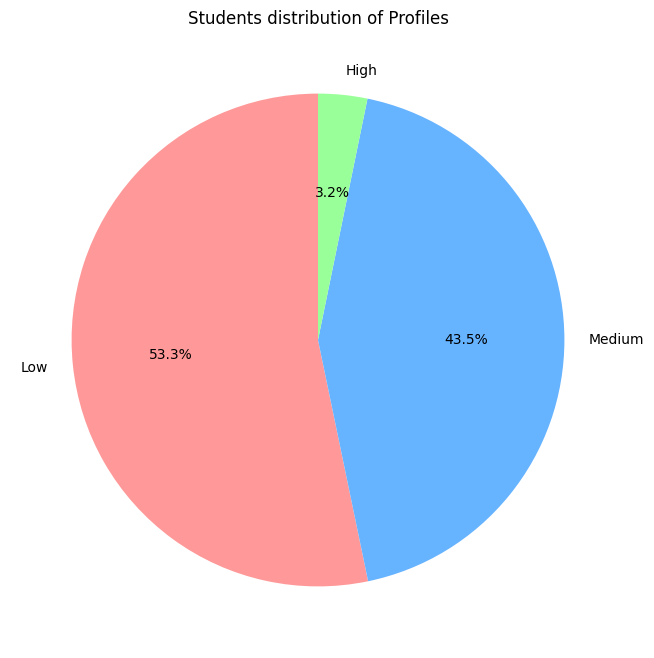

In [5]:
# Contar el número de estudiantes en cada perfil
profile_counts = data['Profile'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

# Añadir título
plt.title('Students distribution of Profiles')

# Mostrar el gráfico
plt.show()


### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [6]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Convertir la columna 'Profile' a valores numéricos
data['Profile_Cat'] = label_encoder.fit_transform(data['Profile'])

# Mostrar las primeras filas del dataframe para verificar
data[['Profile', 'Profile_Cat']].head()

,Profile,Profile_Cat
0,Medium,2
1,Medium,2
2,Low,1
3,Medium,2
4,Low,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [7]:
# Seleccionar las columnas para el modelo (excluyendo 'Profile' y 'Profile_Cat')
X = data.drop(columns=['Profile', 'Profile_Cat', 'StudentID', 'GPA', 'GradeClass'])

# Crear el dataset 'y' que contiene solo la columna categórica 'Profile_Cat'
y = data['Profile_Cat']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar los tamaños de los datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1913, 12)
X_test shape: (479, 12)
y_train shape: (1913,)
y_test shape: (479,)


### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [8]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar tanto X_train como X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las primeras filas del conjunto de entrenamiento escalado
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

        Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0  1.372851  0.971651  -0.846167           2.262116         1.468159   
1 -0.405858  0.971651   2.061708           0.238535        -1.276773   
2  0.483497 -1.029176   1.092416           1.250326        -1.103632   
3  0.483497  0.971651  -0.846167          -0.773256         1.068117   
4 -0.405858 -1.029176  -0.846167          -1.785046        -1.526524   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0  1.105915  1.519766        -1.914656         1.277248  1.510398 -0.497058   
1  0.516509 -0.657996        -1.020215        -0.782933 -0.662077 -0.497058   
2  1.223797 -0.657996        -1.914656        -0.782933 -0.662077 -0.497058   
3  1.223797  1.519766        -0.125774        -0.782933 -0.662077 -0.497058   
4  0.516509  1.519766        -0.125774        -0.782933 -0.662077  2.011838   

   Volunteering  
0     -0.430411  
1      2.323358  
2     -0.430411  
3     -0.430411  
4 

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [9]:
# Definir la red neuronal secuencial
model = Sequential()

# Capa de entrada: 64 unidades, activación ReLU, input_dim basado en las características de X_train
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Capa oculta: 32 unidades, activación ReLU
model.add(Dense(32, activation='relu'))

# Capa de salida: número de unidades igual al número de clases en 'y', activación softmax para clasificación
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3011 (11.76 KB)
Trainable params: 3011 (11.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [10]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo compilado
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3011 (11.76 KB)
Trainable params: 3011 (11.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [11]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=10, 
                    validation_split=0.2)

# Mostrar el resumen del entrenamiento
print(history.history)


Epoch 1/50


153/153 [==============================] - 1s 3ms/step - loss: 0.6062 - accuracy: 0.7673 - val_loss: 0.3324 - val_accuracy: 0.8930
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8987 - val_loss: 0.2664 - val_accuracy: 0.8982
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9118 - val_loss: 0.2482 - val_accuracy: 0.9034
Epoch 4/50
153/153 [==============================] - 2s 11ms/step - loss: 0.1997 - accuracy: 0.9131 - val_loss: 0.2125 - val_accuracy: 0.9086
Epoch 5/50
153/153 [==============================] - 3s 21ms/step - loss: 0.1796 - accuracy: 0.9301 - val_loss: 0.2111 - val_accuracy: 0.9112
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.9294 - val_loss: 0.2123 - val_accuracy: 0.9164
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9314 - val_loss: 0.2034 - val_accuracy: 0.9164
Ep

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

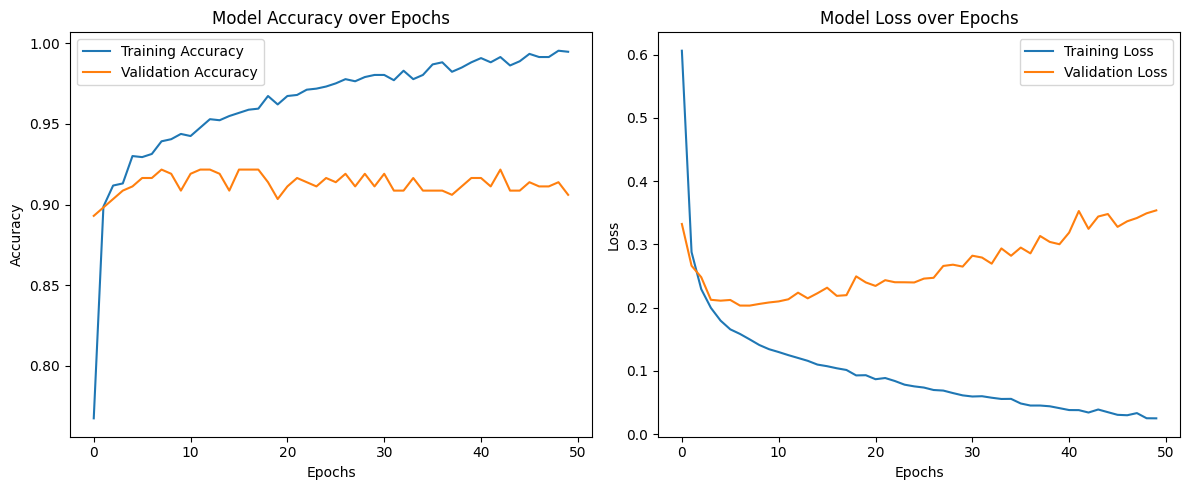

In [12]:
# Graficar la exactitud (accuracy) de entrenamiento y validación
plt.figure(figsize=(12, 5))

# Primera gráfica: Exactitud
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()

# Segunda gráfica: Pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

Observa el resultado de tu función de pérdida:

En el gráfico de la derecha, la pérdida de entrenamiento (línea azul) disminuye de aproximadamente 0.6 a casi 0, lo que indica que el modelo está aprendiendo bien durante el entrenamiento.
La pérdida de validación (línea naranja) también disminuye, pero se estabiliza alrededor de 0.4, lo que sugiere que el modelo está generalizando razonablemente bien a los datos no vistos.

¿Qué puedes deducir de ahí?

La disminución constante de la pérdida de entrenamiento indica que el modelo está mejorando su capacidad para predecir correctamente los datos de entrenamiento.
La estabilización de la pérdida de validación sugiere que el modelo no está sobreajustando significativamente, pero hay margen para mejorar su rendimiento en datos no vistos.
Si la pérdida de validación se estabiliza y no sigue disminuyendo, podría ser útil ajustar los hiperparámetros del modelo o utilizar técnicas de regularización para mejorar la generalización. 

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [13]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Convertir las predicciones a clases
predicted_classes = np.argmax(predictions, axis=1)

# Reemplazar los valores numéricos por las etiquetas correspondientes
label_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
predicted_labels = [label_mapping[class_id] for class_id in predicted_classes]
actual_labels = [label_mapping[class_id] for class_id in y_test]

# Imprimir las predicciones y los valores reales
for i in range(len(predicted_labels)):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")

# Evaluar el modelo
accuracy = np.sum(predicted_classes == y_test) / len(y_test)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


15/15 [==============================] - 0s 2ms/step
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: High
Predicted: Medium, Actual: High
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: High
Predicted: Medium, 

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [29]:
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas categóricas a numéricas
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(data['Profile_Cat'])

# Ingeniería de Datos del Conjunto de Datos
X2 = data.drop(columns=['StudentID', 'GPA', 'GradeClass', 'Ethnicity', 'ParentalEducation'])

# Asegurarse de que todas las columnas en X2 sean numéricas
X2 = X2.apply(pd.to_numeric, errors='coerce')

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Escalar los datos
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Definir el modelo
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=X2_train_scaled.shape[1]))
model2.add(Dropout(0.5))  # Añadir capa de dropout para prevenir sobreajuste
model2.add(Dense(64, activation='relu'))
model2.add(Dense(len(np.unique(y2_train)), activation='softmax'))

# Compilar el modelo
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
history2 = model2.fit(X2_train_scaled, y2_train, 
                      epochs=100, 
                      batch_size=20, 
                      validation_split=0.2)


Epoch 1/100


c:\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


77/77 [==============================] - 1s 3ms/step - loss: 1.0789 - accuracy: 0.5294 - val_loss: 1.0597 - val_accuracy: 0.5039
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 1.0426 - accuracy: 0.5438 - val_loss: 1.0272 - val_accuracy: 0.5039
Epoch 3/100
77/77 [==============================] - 0s 1ms/step - loss: 1.0119 - accuracy: 0.5438 - val_loss: 0.9994 - val_accuracy: 0.5039
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 0.9854 - accuracy: 0.5438 - val_loss: 0.9756 - val_accuracy: 0.5039
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9626 - accuracy: 0.5438 - val_loss: 0.9554 - val_accuracy: 0.5039
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.5438 - val_loss: 0.9381 - val_accuracy: 0.5039
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9261 - accuracy: 0.5438 - val_loss: 0.9231 - val_accuracy: 0.5039
Epoch 8/100
77/77 [======

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [22]:
# Ingeniería de Datos del Conjunto de Datos
X3 = data.drop(columns=['Profile', 'Profile_Cat', 'StudentID', 'GPA', 'GradeClass'])
y3 = data['Profile_Cat']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Escalar los datos
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Definir el modelo
model3 = Sequential()
model3.add(Dense(256, activation='relu', input_dim=X3_train_scaled.shape[1]))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(len(np.unique(y3_train)), activation='softmax'))

# Compilar el modelo
model3.compile(optimizer='adagrad',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
history3 = model3.fit(X3_train_scaled, y3_train, 
                      epochs=75, 
                      batch_size=15, 
                      validation_split=0.2)


Epoch 1/75
102/102 [==============================] - 1s 3ms/step - loss: 1.0021 - accuracy: 0.5523 - val_loss: 0.9215 - val_accuracy: 0.6371
Epoch 2/75
102/102 [==============================] - 0s 1ms/step - loss: 0.8567 - accuracy: 0.6778 - val_loss: 0.8092 - val_accuracy: 0.7232
Epoch 3/75
102/102 [==============================] - 0s 1ms/step - loss: 0.7633 - accuracy: 0.7444 - val_loss: 0.7284 - val_accuracy: 0.7702
Epoch 4/75
102/102 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.7935 - val_loss: 0.6649 - val_accuracy: 0.8172
Epoch 5/75
102/102 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8229 - val_loss: 0.6132 - val_accuracy: 0.8460
Epoch 6/75
102/102 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8529 - val_loss: 0.5708 - val_accuracy: 0.8695
Epoch 7/75
102/102 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.8693 - val_loss: 0.5356 - val_accuracy: 0.8773
Epoch 

In [31]:
loss, accuracy = model.evaluate(X2_test_scaled, y2_test)
print(f"Modelo 1 - Precisión: {accuracy * 100:.2f}%, Pérdida: {loss:.4f}")

# Evaluar el modelo 2
loss2, accuracy2 = model2.evaluate(X2_test_scaled, y2_test)
print(f"Modelo 2 - Precisión: {accuracy2 * 100:.2f}%, Pérdida: {loss2:.4f}")

# Evaluar el modelo 3
loss3, accuracy3 = model3.evaluate(X3_test_scaled, y3_test)
print(f"Modelo 3 - Precisión: {accuracy3 * 100:.2f}%, Pérdida: {loss3:.4f}")


15/15 [==============================] - 0s 1ms/step - loss: 0.8225 - accuracy: 0.5198
Modelo 1 - Precisión: 51.98%, Pérdida: 0.8225
15/15 [==============================] - 0s 980us/step - loss: 0.8147 - accuracy: 0.5198
Modelo 2 - Precisión: 51.98%, Pérdida: 0.8147
15/15 [==============================] - 0s 955us/step - loss: 0.2747 - accuracy: 0.8956
Modelo 3 - Precisión: 89.56%, Pérdida: 0.2747
